In [1]:
import numpy as np
import pandas as pd

np.random.seed(123)

df = pd.DataFrame({'col1': np.random.randint(20, size=20), 
                   'col2': np.random.randn(20)})

df=df.append({'col1' : 50 ,  'col2' : 5.1245} , ignore_index=True) # outlier들을 추가한다. 

df

,col1,col2
0,13.0,1.730024
1,2.0,1.232650
2,2.0,-0.823598
3,6.0,-0.118201
4,17.0,-0.576103
5,19.0,1.695731
6,10.0,-0.074394
7,1.0,-1.900637
8,0.0,-0.777655
9,17.0,1.313462


## 1-4.데이터 분포 탐색
### 1-4-1.백분위수와 boxplot

In [36]:
import numpy as np

df['col1'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05     0.0
0.25     2.0
0.50    10.0
0.75    15.0
0.95    19.0
Name: col1, dtype: float64

5% 백분위수는 0인 반면 95% 백분위수는 19에 달하는 등 변동폭이 있으며, 중간값은 10이다.  
추가했던 특잇값에 영향을 받지 않았다. 

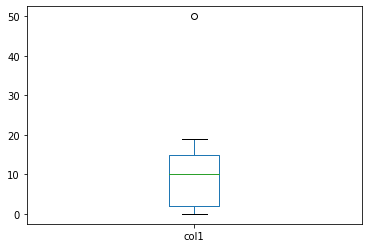

In [51]:
# box plot
import matplotlib.pyplot as plt

ax = (df['col1']).plot.box()

위의 boxplot에서 중간값이 약 10이고(굵은 수평선), 데이터의 절반이 약 2.5~15사이이며(상자의 위쪽과 아래쪽), 이상치(50)를 한눈에 알 수 있다. 점섬은 whisker라 부르며 데이터 전체 범위를 나타내주는 위아래 선들과 연결되어 있다. 

### 1-4-2.도수분표포와 히스토그램

In [55]:
import pandas as pd

binnedPopulation = pd.cut(df['col1'], 10)
binnedPopulation.value_counts()

(-0.05, 4.545]      8
(13.636, 18.182]    6
(4.545, 9.091]      2
(9.091, 13.636]     2
(18.182, 22.727]    2
(45.455, 50.0]      1
(22.727, 27.273]    0
(27.273, 31.818]    0
(31.818, 36.364]    0
(36.364, 40.909]    0
(40.909, 45.455]    0
Name: col1, dtype: int64

In [57]:
print(df['col1'].min(), df['col1'].max())


0.0 50.0


col1 컬럼에서 가장 작은 값은 0, 가장 큰 값은 50이다. 이를 통해 범위가 50-0=50이라는 것을 알 수 있다. 이를 균일한 크기로 10개로 나누려면 각 구간의 크기가 5가 되어야 한다.  
구간의 범위가 너무 크면, 분포를 나타내는 중요한 특징을 놓칠 수 있다. 반대로 너무 작아도, 결과가 너무 쪼개져 있어 더 큰 그림을 볼 수 없다. 

히스토그램은 도수분포표를 시각화하는 방법이다. x축엔 구간들을, y축엔 해당 구간별 데이터의 개수를 표시한다. 

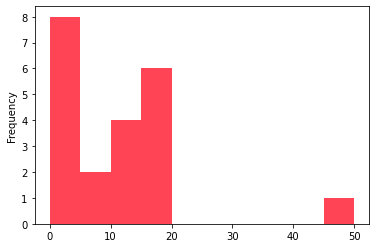

In [60]:
import matplotlib.pyplot as plt

ax = (df['col1']).plot.hist(color='#FF4455') # hist의 키워드 인수 bins를 사용해 구간의 개수를 정의할 수 있다. 

> 통계학 이론에서, 위치와 변이는 각각 분포의 일,이차 모멘트(적률)라고 한다. 삼차, 사차 모멘트는 각각 왜도skewness, 첨도kurtosis라고 부른다. 왜도는 데이터가 큰 값이나 작은 값 쪽으로 얼마나 비스듬히 쏠려 있는지를 나타내고, 첨도는 데이터가 극단 값을 갖는 경향성을 나타낸다.

### 1-4-3.밀도 그림과 추정
커널밀도추정을 통해 데이터로부터 직접 계산한다. 

<AxesSubplot:ylabel='Density'>

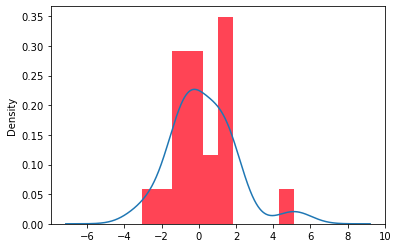

In [84]:
ax = (df['col2']).plot.hist(density=True, color='#FF4455') #, xlim=[0,20], bins=range(0,20),)
df['col2'].plot.density(ax=ax)

히스토그램과의 가장 큰 차이는 y축 값의 단위이다. 밀도 그림에선 개수가 아닌 비율을 표시한다. 밀도 곡선 아래의 총면적은 1이고 구간의 개수 대신 x축의 두 점 사이의 곡선 아래 면적을 계산하며, 이는 두 점 사이에 있는 분포의 비율에 해당한다. 

## 1-6.상관관계

In [7]:
import pandas as pd

df = pd.DataFrame({'col1': np.random.randn(20), 
                   'col2': np.random.randn(20),
                   'col3':np.random.randn(20)})

df

,col1,col2,col3
0,-0.869044,0.523320,0.088379
1,2.398402,-0.931956,-1.338411
2,-1.001390,2.266338,-1.968150
3,1.602473,0.539784,-0.218138
4,1.498786,-0.091474,0.206562
5,0.525211,-1.991864,-0.856458
6,0.831080,-0.241881,0.596262
7,0.022368,0.210780,-1.439107
8,-0.069009,-0.145566,0.627442
9,-1.933373,-1.024901,-0.307774


In [8]:
df.corr()

,col1,col2,col3
col1,1.000000,0.227288,-0.200962
col2,0.227288,1.000000,-0.251809
col3,-0.200962,-0.251809,1.000000


<AxesSubplot:>

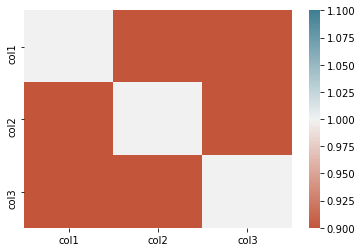

In [9]:
import seaborn as sns

sns.heatmap(df.corr(), vmin=1, cmap=sns.diverging_palette(20,220, as_cmap=True))